In [90]:
import pandas as pd
import numpy as np


zz_df = pd.read_csv('SIPR/origin_dataset/zz500_2018_2023_new_1.csv',index_col=False)
hs_df = pd.read_csv('SIPR/origin_dataset/hs300_2018_2023_new_1.csv',index_col=False)
nd_df = pd.read_csv('SIPR/origin_dataset/nd100_2018_2023_new_1.csv',index_col=0)
sp_df = pd.read_csv('SIPR/origin_dataset/sp500_2018_2023_new_1.csv',index_col=0)

In [76]:
zz_df.head()

,kdcode,dt,close,open,high,low,prev_close,adjfactor,turnover,volume,sw_kdcode_1,sw_kdcode_2
0,000006.SZ,2018-01-02,9.85,0.00,0.00,0.00,9.85,60.559563,0.0,0.0,430000,430100
1,000009.SZ,2018-01-02,7.32,7.27,7.33,7.23,7.23,9.983859,140497530.0,19269993.0,510000,510100
2,000012.SZ,2018-01-02,8.62,8.34,8.72,8.33,8.45,24.644983,327359068.0,38242586.0,610000,610200
3,000021.SZ,2018-01-02,9.83,9.86,9.90,9.65,9.73,14.421441,243375639.0,24814248.0,710000,710100
4,000025.SZ,2018-01-02,38.82,38.15,38.90,38.15,38.51,1.883400,59397198.0,1536660.0,280000,280300


In [77]:
nd_df.head()

,dt,open,high,low,close,adjfactor,volume,kdcode,prev_close,sw_kdcode_2,sw_kdcode_1
0,2018-1-2,42.540001,43.075001,42.314999,43.064999,40.722866,102223600,AAPL,42.540001,Consumer Electronics,Technology
1,2018-1-3,43.132500,43.637501,42.990002,43.057499,40.715786,118071600,AAPL,43.064999,Consumer Electronics,Technology
2,2018-1-4,43.134998,43.367500,43.020000,43.257500,40.904911,89738400,AAPL,43.057499,Consumer Electronics,Technology
3,2018-1-5,43.360001,43.842499,43.262501,43.750000,41.370625,94640000,AAPL,43.257500,Consumer Electronics,Technology
4,2018-1-8,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,AAPL,43.750000,Consumer Electronics,Technology


In [94]:
columns = ['kdcode','dt','close','open','high','low','prev_close','volume','turnover','sw_kdcode_1','sw_kdcode_2']
hs_df['dt'] = pd.to_datetime(hs_df['dt'], format='%Y-%m-%d')

hs_df = hs_df[columns]
grouped = hs_df.groupby('kdcode')

sorted_grouped = grouped.apply(lambda x: x.sort_values(by='dt'))
sorted_grouped = sorted_grouped.reset_index(drop=True)
cleaned_df = sorted_grouped.drop(columns=['sw_kdcode_1', 'sw_kdcode_2'])
cleaned_df = cleaned_df[(cleaned_df != 0).all(axis=1)]

group_lengths = cleaned_df.groupby('kdcode').size()
max_length = group_lengths.max()
filtered_grouped = cleaned_df[cleaned_df['kdcode'].isin(group_lengths[group_lengths == max_length].index)]

filtered_grouped.to_csv('SIPR/dataset/hs300.csv', index=False)

/tmp/ipykernel_116501/2405573085.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_grouped = grouped.apply(lambda x: x.sort_values(by='dt'))


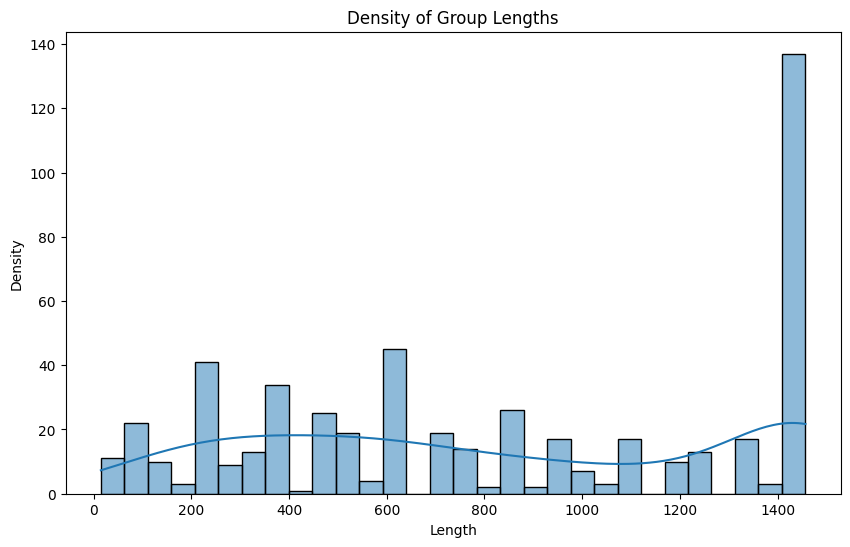

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
# 可视化
plt.figure(figsize=(10, 6))
sns.histplot(group_lengths, bins=30, kde=True)
plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Density of Group Lengths')
plt.show()

In [7]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('./index_data/sp500_index.csv')

# 去除列名中的双引号，并重命名列名
df.columns = ["date", "close", "open", "high", "low", "volume", "return"]

# 去除字段值中的双引号
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

# 将各列转换为合适的数据类型
df['date'] = pd.to_datetime(df['date'])
df['close'] = pd.to_numeric(df['close'].str.replace(',', ''))
df['open'] = pd.to_numeric(df['open'].str.replace(',', ''))
df['high'] = pd.to_numeric(df['high'].str.replace(',', ''))
df['low'] = pd.to_numeric(df['low'].str.replace(',', ''))

# 处理volume列, 把K转换为千，M转换为百万，处理缺失值
def convert_volume(volume_str):
    if pd.isna(volume_str) or volume_str == '':
        return None
    if 'K' in volume_str:
        return float(volume_str.replace('K', '')) * 1_000
    elif 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1_000_000
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '')) * 1_000_000_000
    else:
        return float(volume_str)

df['volume'] = df['volume'].apply(convert_volume)
df['return'] = pd.to_numeric(df['return'].str.replace('%', '')) / 100

# 按日期排序
df = df.sort_values(by='date')

# 输出处理后的DataFrame
df.to_csv('./index_data/sp500_index.csv',index=False)

/tmp/ipykernel_2715817/2423883693.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
